<a href="https://colab.research.google.com/github/maxchanhi/dissconant_calculationv2/blob/master/plomp_levelt_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A version added with dBspl to sone and it can work with any number of partials.
# The printed results can be put in Excel for graph 
import math
f_base = 220
partials = [1,2,3,4,5,6,7,8,9]
SPLloudness = [80,73.97,67.95,66.84,66.02,65.1,64.08,40,30,25]
swift_range = 2 #Default one octave
def SPL_to_sone(freq,loudness):
  if freq > 30 and freq <= 60:
    af = 0.432
    Lu = -15.9
    Tf = 44
  elif freq > 60 and freq <= 80:
    af = 0.409
    Lu = -13
    Tf = 37.5
  elif freq > 80 and freq <= 125:
    af = 0.349
    Lu = -6.2
    Tf = 22.1
  elif freq > 125 and freq <= 200:
    af = 0.330
    Lu = -4.5
    Tf = 17.9
  elif freq > 200 and freq <= 300:
    af = 0.301
    Lu = -2
    Tf = 11.4
  elif freq > 300 and freq <= 500:
    af = 0.276
    Lu = -0.1
    Tf = 6.2
  elif freq > 500 and freq <= 800:
    af = 0.259
    Lu = 0.3
    Tf = 3
  elif freq > 800 and freq <= 1200:
    af = 0.250
    Lu = 0
    Tf = 2.4
  elif freq > 1200 and freq <= 1500:
    af = 0.246
    Lu = -2.7
    Tf = 3.5
  elif freq > 1500 and freq <= 1800:
    af = 0.244
    Lu = -4.1
    Tf = 1.7
  elif freq > 1800 and freq <= 2200:
    af = 0.243
    Lu = -1
    Tf = -1.3
  elif freq > 2200 and freq <= 2900:
    af = 0.243
    Lu = 1.7
    Tf = -4.2
  elif freq > 2900 and freq <= 3500:
    af = 0.243
    Lu = 2.5
    Tf = -6
  elif freq > 3500 and freq <= 4500:
    af = 0.242
    Lu = 1.2
    Tf = -5.2
  elif freq > 4500 and freq <= 5500:
    af = 0.242
    Lu = -2.1
    Tf = -1.5
  elif freq > 5500 and freq <= 7500:
    af = 0.245
    Lu = -7.1
    Tf = 6
  elif freq > 7500 and freq <= 9000:
    af = 0.245
    Lu = -11.2
    Tf = 12.6
  elif freq > 9000 and freq <= 11000:
    af = 0.271
    Lu = -10.7
    Tf = 13.9
  elif freq > 11000:
    af = 0.301
    Lu = -3.1
    Tf = 12.3

  Bf2 = ((0.4 * (10 ** (((loudness + Lu) / 10) - 9))) ** af) - (
          0.4 * (10 ** (((Tf + Lu) / 10) - 9)) ** af + 0.005135)
  if Bf2 > 0:
    Phlf2 = 40 * math.log10(Bf2) + 94
    return 2 ** (0.1 * Phlf2 - 4)
  else:
    pass
def plomp(f1, f2):
    fmin = min(f1, f2)
    fmax = max(f1, f2)
    s = 0.24 / (0.021 * fmin + 19.)
    return (math.exp(-3.5 * s * (fmax - fmin)) - math.exp(-5.75 * s * (fmax - fmin)))

def spectrum_list(f):
    list = []
    for i in range(len(partials)):
        list.append(f*partials[i])
    return list

for f2 in range(f_base,int(f_base*swift_range)):
    c = 0
    for j in range(len(partials)):
        for k in range(len(partials)):
            c += plomp(spectrum_list(f_base)[j],spectrum_list(f2)[k])*min(SPL_to_sone(f_base,SPLloudness[j]),SPL_to_sone(f2,SPLloudness[k]))
    print(c)

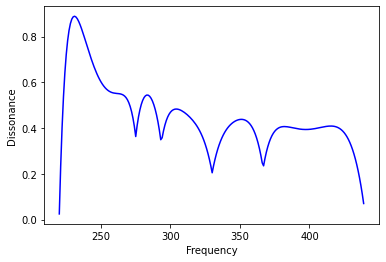

In [ ]:
# this is the version from alpof and i improved it. https://alpof.wordpress.com/2015/04/05/consonance-calculations-1/
import numpy as np
import matplotlib.pyplot as plt

base_freq = 220
partial = [1,2,3,4,5]
#### This is the Plomp & Levelt consonance formula for two sinusoids of frequencies f1 and f2 of the same loudness

def plomp(f1, f2):
    fmin = min(f1, f2)
    fmax = max(f1, f2)
    s = 0.24 / (0.021 * fmin + 19.)
    return (np.exp(-3.5 * s * (fmax - fmin)) - np.exp(-5.75 * s * (fmax - fmin)))


#### Given a matrix as input, where the rows represent the different sounds,
#### and the columns represent the frequencies of the spectrum of each sound,
#### this function calculate the total consonance value

def plompSpectrum(spectrum):
    nSpectr, nFreq = spectrum.shape

    c = 0.0
    for i in range(nSpectr):
        for j in range(i + 1, nSpectr):
            for k in range(nFreq):
                for l in range(nFreq):
                    c = c + plomp(spectrum[i][k], spectrum[j][l])
    return c
def gen_spectrum0(x):
  list = []
  for g in range(len(partial)):
    list.append(x*partial[g])
  return list

sweepingFrequency = np.arange(base_freq,base_freq*2,1.)
consonanceCurve = np.zeros((len(sweepingFrequency)))
spectrum = np.zeros((2,len(partial)))
for i,f in enumerate(sweepingFrequency):
    spectrum[0] = gen_spectrum0(base_freq)
    spectrum[1] = gen_spectrum0(f)
    consonanceCurve[i] = plompSpectrum(spectrum)
 
plt.plot(sweepingFrequency,consonanceCurve,'-b')
plt.xlabel("Frequency")
plt.ylabel("Dissonance")
plt.show()
